In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

# To ignore warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the CNN/Daily Mail dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Display the dataset structure
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})


In [3]:
# Display a few examples from the dataset
print(dataset['train'][0])
print(dataset['validation'][0])
print(dataset['test'][0])

# Convert to a pandas DataFrame for easier manipulation
df_train = pd.DataFrame(dataset['train'])
df_valid = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])

# Display basic statistics
print(df_train.describe())
print(df_valid.describe())
print(df_test.describe())


{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

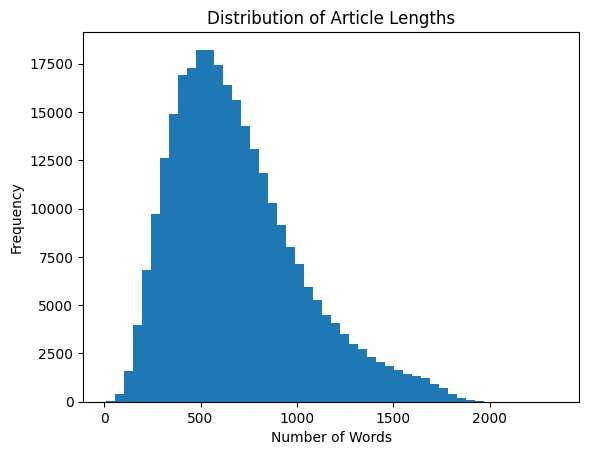

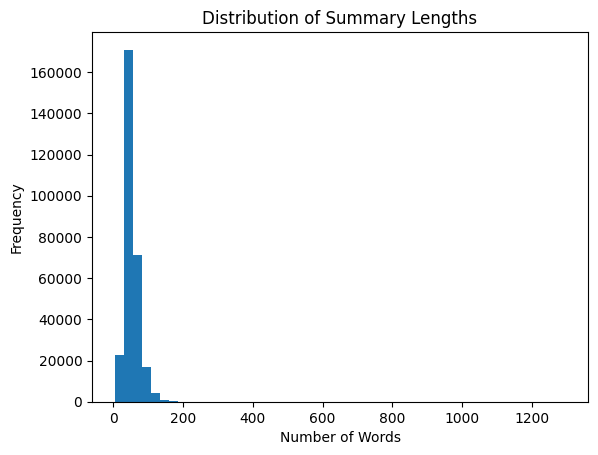

In [4]:
# Plot the distribution of article lengths
article_lengths = df_train['article'].apply(lambda x: len(x.split()))
plt.hist(article_lengths, bins=50)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()
# Plot the distribution of summary lengths
summary_lengths = df_train['highlights'].apply(lambda x: len(x.split()))
plt.hist(summary_lengths, bins=50)
plt.title('Distribution of Summary Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [5]:
from transformers import T5Tokenizer

# Initialize tokenizer
tokenizer = T5Tokenizer.from_pretrained('t5-small')

# Tokenize a sample article
sample_article = df_train['article'][0]
tokenized_article = tokenizer.encode(sample_article, max_length=512, truncation=True)
print(tokenized_article)

# Decode the tokenized article
decoded_article = tokenizer.decode(tokenized_article)
print(decoded_article)


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[301, 24796, 4170, 6, 2789, 41, 18844, 61, 1636, 8929, 16023, 2213, 4173, 6324, 12591, 15, 11391, 592, 12, 3, 9, 2196, 3996, 1755, 770, 8785, 591, 11039, 770, 61, 13462, 38, 3, 88, 5050, 507, 30, 2089, 6, 68, 3, 88, 10419, 7, 8, 540, 751, 31, 17, 4061, 3, 9, 10783, 30, 376, 5, 4173, 6324, 12591, 15, 38, 8929, 16023, 16, 96, 15537, 651, 16023, 11, 8, 5197, 13, 8, 12308, 121, 304, 8, 19142, 13, 29517, 6710, 343, 7, 300, 8, 296, 6, 8, 1021, 7556, 845, 3, 88, 65, 150, 1390, 12, 9030, 17, 449, 112, 1723, 550, 30, 1006, 2948, 6, 3281, 11, 17086, 2251, 5, 96, 196, 278, 31, 17, 515, 12, 36, 80, 13, 273, 151, 113, 6, 38, 1116, 38, 79, 919, 14985, 8247, 805, 1452, 3, 9, 3805, 2100, 443, 1232, 42, 424, 1126, 976, 3, 88, 1219, 46, 3746, 2772, 49, 2283, 48, 847, 5, 96, 196, 278, 31, 17, 317, 27, 31, 195, 36, 1989, 28887, 5, 96, 634, 378, 27, 114, 2611, 33, 378, 24, 583, 81, 335, 7051, 1636, 1335, 11, 3190, 7, 11, 5677, 7, 535, 486, 14985, 6324, 12591, 15, 56, 36, 3, 179, 12, 24068, 16, 3, 9, 2653, 

2024-07-06 11:25:46.679555: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Details of how

In [6]:
df_train.to_csv('cleaned_train.csv', index=False)
df_valid.to_csv('cleaned_valid.csv', index=False)
df_test.to_csv('cleaned_test.csv', index=False)
